In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from plot_keras_history import show_history
import mlflow

2024-04-25 00:01:49.907366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 00:01:49.944326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 00:01:50.210587: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 00:01:50.212670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 00:01:51.819618: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

(60000, 784) train input samples
(10000, 784) test input samples


In [5]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4018 - accuracy: 0.8871 - val_loss: 0.2103 - val_accuracy: 0.9371
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1740 - accuracy: 0.9473 - val_loss: 0.1392 - val_accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1203 - accuracy: 0.9632 - val_loss: 0.1043 - val_accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0903 - accuracy: 0.9723 - val_loss: 0.0933 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0811 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.0809 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0749 - val_accuracy:

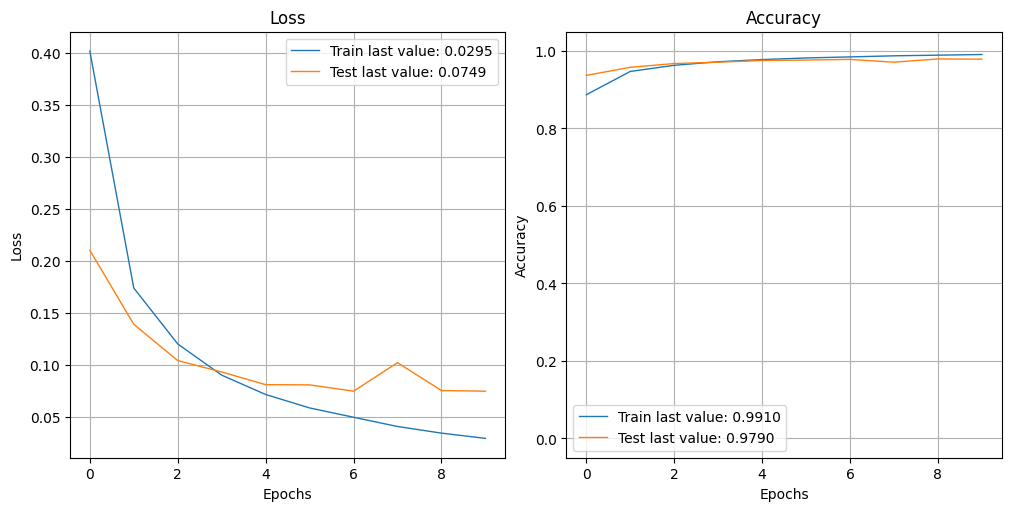

313/313 - 1s - loss: 0.0749 - accuracy: 0.9790 - 758ms/epoch - 2ms/step
Test accuracy: 97.90%
1875/1875 - 5s - loss: 0.0226 - accuracy: 0.9930 - 5s/epoch - 2ms/step
Train accuracy: 99.30%


In [6]:
model = keras.Sequential()
model.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
show_history(history)
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

In [7]:
model.save('./model.keras')